Shape of one row data:
(1478, 400)
(400,)
[ 6.66234127e+005  2.79610421e+009  4.20498314e+005  2.41865377e+008
  3.04773698e+008  1.33246825e+006  3.86984603e+009  1.44713157e+005
  1.52386849e+008  8.73782565e+007  3.15695362e+003  7.43765123e+008
  7.89238406e+002  2.69118920e+007  7.42702503e+006  1.11976212e+002
  1.41202081e+008 -2.53392831e+001  4.20498438e+005  1.66558532e+005
 -6.13452378e+001  1.62521540e+007 -1.49352368e+003  1.66558594e+005
  3.26886598e+238  3.00489544e-307  9.37908771e-196 -3.73651724e-230
  3.44209773e+012 -2.60706991e-003 -4.09624439e+005  3.76807813e+005
 -4.09624312e+005  1.49925685e+000  7.69178751e-011 -2.48502969e+005
  3.33117063e+005 -6.44486124e+005  5.82961919e-001 -1.87593014e-001
 -3.27699551e+006  4.94857320e+003 -3.27699550e+006  1.01634578e-004
 -4.00119096e+001 -2.57794551e+006  5.05112576e+004 -5.15589100e+006
 -2.60707132e-003 -1.01357132e+002 -2.92747151e+006  1.44713156e+005
 -7.95209498e+006 -2.53392907e+001 -6.11259167e-005 -7.318678

/Users/antonvasilev/PyCharmProjects/emg-interface/venv/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Epoch 1/50
16/16 [==============================] - 4s 147ms/step - loss: 2.2277 - accuracy: 0.1180 - val_loss: 2.2068 - val_accuracy: 0.1194
Epoch 2/50
16/16 [==============================] - 2s 109ms/step - loss: 2.2225 - accuracy: 0.1035 - val_loss: 2.1781 - val_accuracy: 0.1306
Epoch 3/50
16/16 [==============================] - 2s 116ms/step - loss: 2.2253 - accuracy: 0.0986 - val_loss: 2.1934 - val_accuracy: 0.1351
Epoch 4/50
16/16 [==============================] - 2s 115ms/step - loss: 2.2301 - accuracy: 0.1054 - val_loss: 2.2783 - val_accuracy: 0.0541
Epoch 5/50
16/16 [==============================] - 2s 111ms/step - loss: 2.2148 - accuracy: 0.1286 - val_loss: 2.2339 - val_accuracy: 0.0721
Epoch 6/50
16/16 [==============================] - 2s 109ms/step - loss: 2.2044 - accuracy: 0.1161 - val_loss: 2.2259 - val_accuracy: 0.0721
Epoch 7/50
16/16 [==============================] - 2s 112ms/step - loss: 2.2199 - accuracy: 0.1141 - val_loss: 2.2131 - val_accuracy: 0.1374
Epoch 

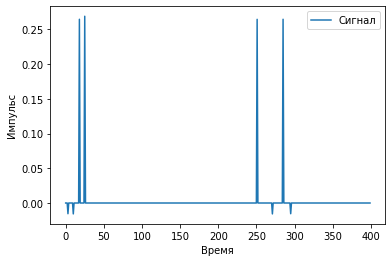

In [127]:

from src.data_manager.rflab_np_manager import RflabNpDataManager
import numpy as np
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, BatchNormalization, LSTM, Conv1D, Reshape, Dropout
from keras.datasets import imdb
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

np.random.seed(42)

np.set_printoptions(suppress=True)


rflab_manager = RflabNpDataManager()
dataset = rflab_manager.load()

X_train = dataset[2:, 0:-1]
X_train[np.isnan(X_train)] = 0.
print('Shape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])
# X_train = np.reshape(X_train, (X_train.shape[0], 400, 1))
print('ReShape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])

print('before nornalize')
print(X_train[0])
row_sums = X_train.sum(axis=1)
X_train = X_train / row_sums[:, np.newaxis]
print('after nornalize')
print(X_train[0])

Y_train = dataset[2:, -1]
print('Class labels:')
print(np.unique(Y_train))

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(Y_train, num_classes=9)
print(one_hot_labels.shape)
print(np.unique(one_hot_labels))

model = Sequential()
num_classes = 9
time_series = X_train.shape[1]
model.add(Reshape((400, 1), input_shape=(400,)))
model.add(SimpleRNN(64, input_shape=(None, 400, 1), return_sequences=True))
model.add(SimpleRNN(8))
# model.add(Dense(1024, input_dim=400, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, one_hot_labels, epochs=50, batch_size=65, validation_split=0.3)
y_pred = model.predict(X_train[0:1])
# print(X_train[0:1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)

plt.plot(X_train[140],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')

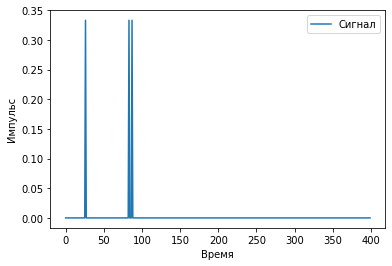

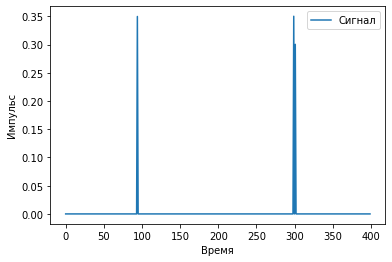

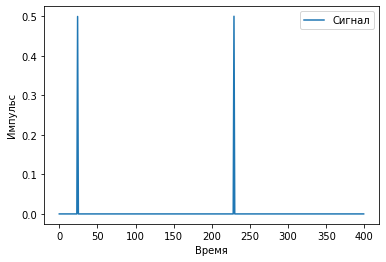

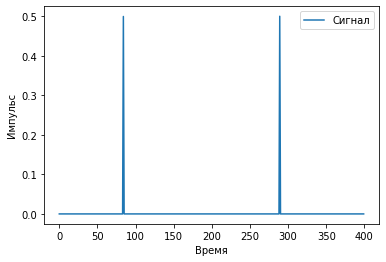

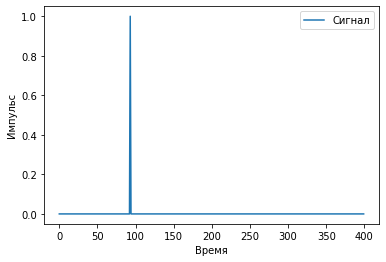

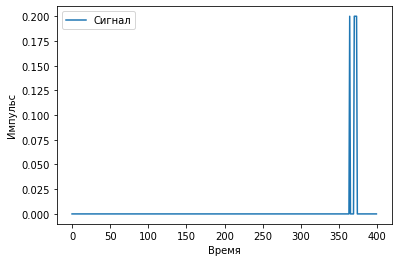

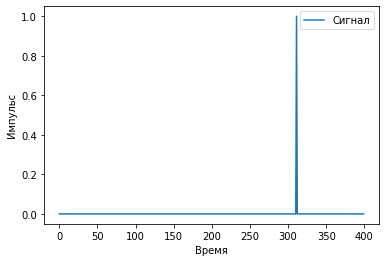

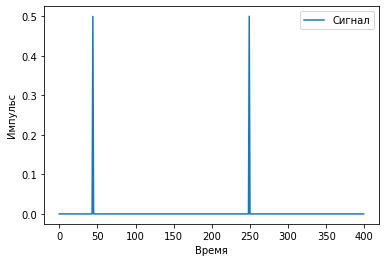

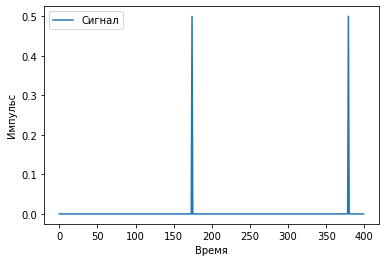

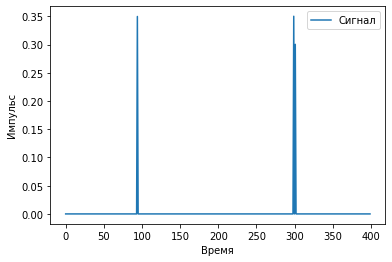

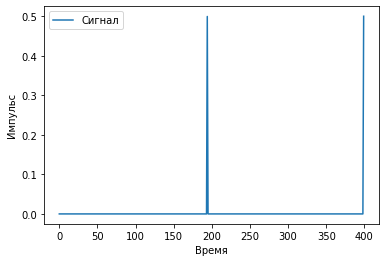

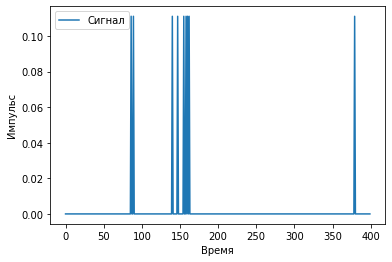

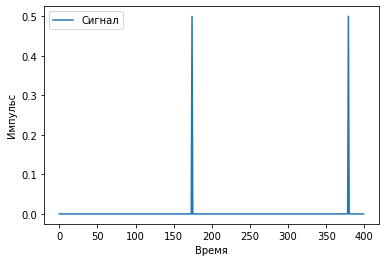

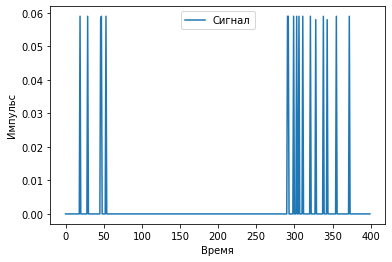

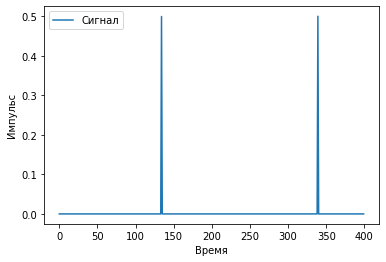

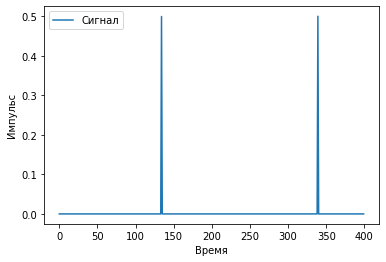

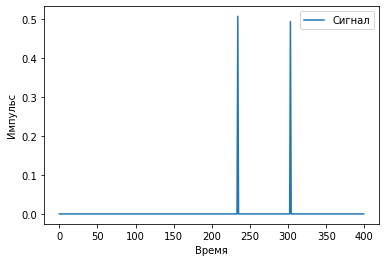

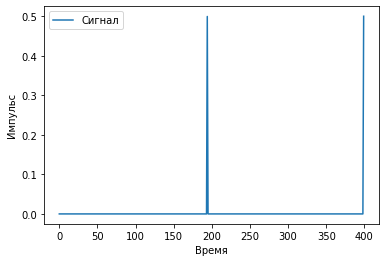

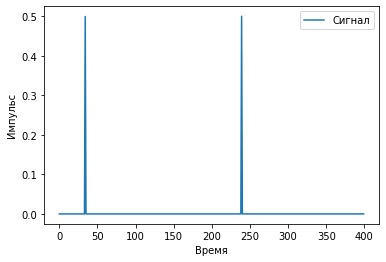

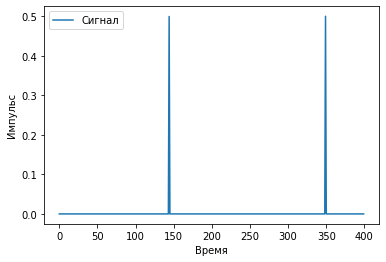

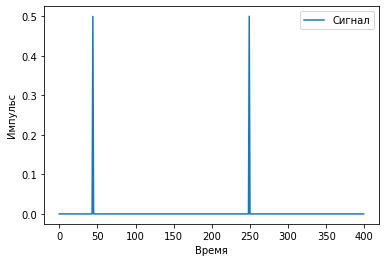

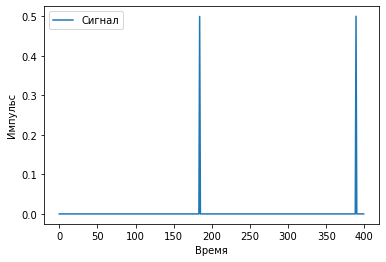

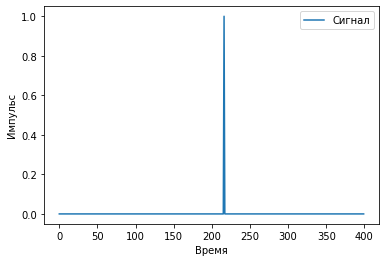

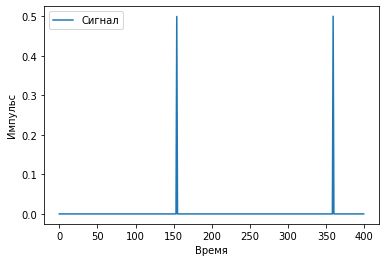

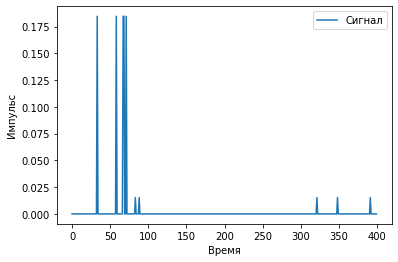

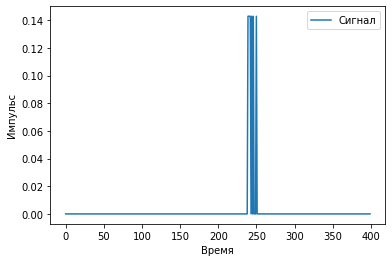

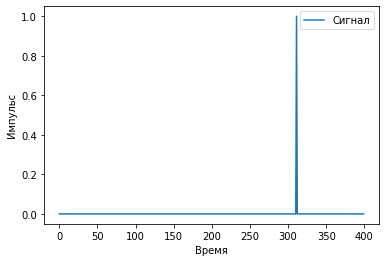

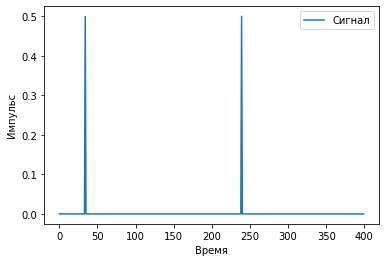

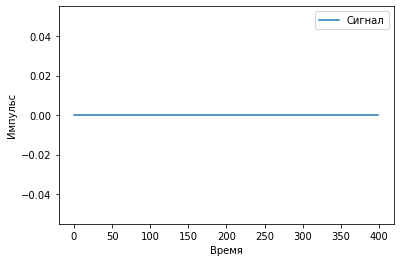

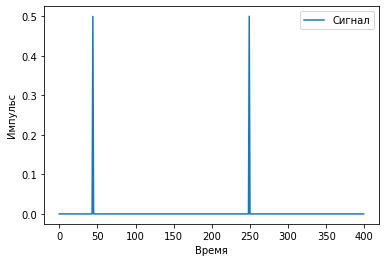

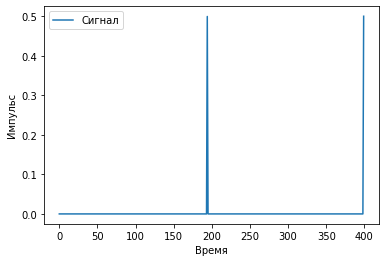

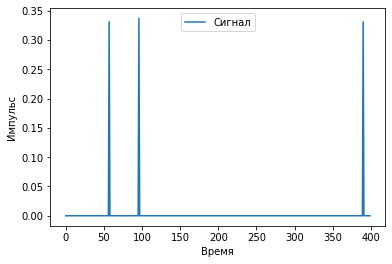

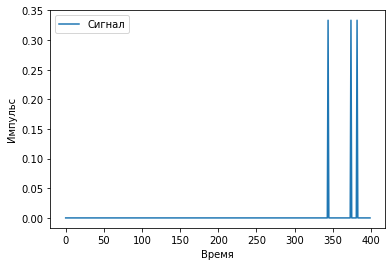

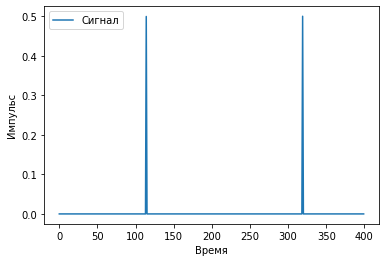

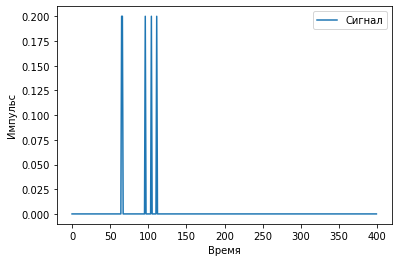

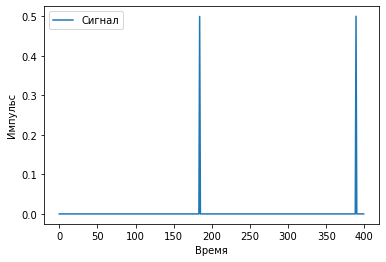

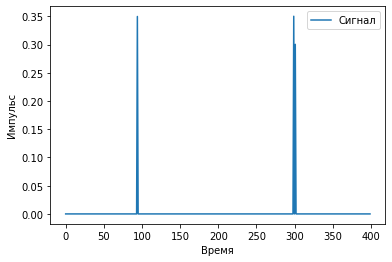

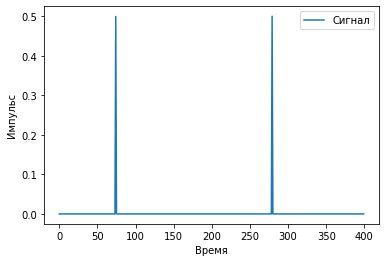

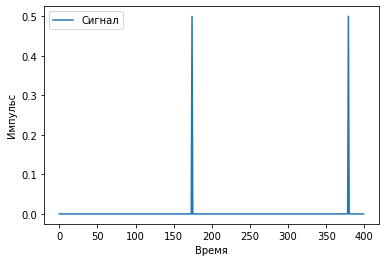

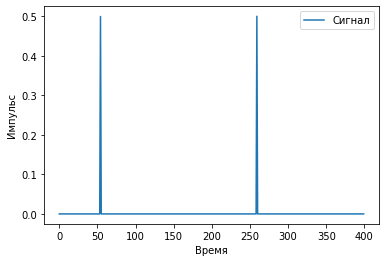

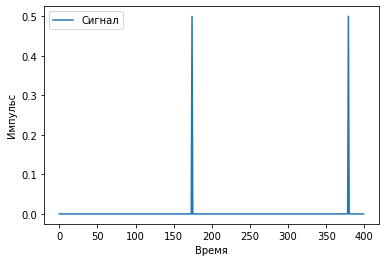

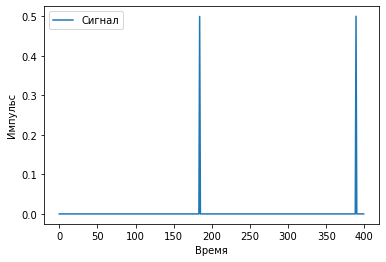

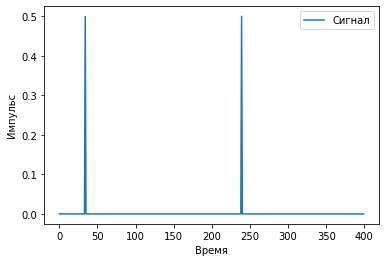

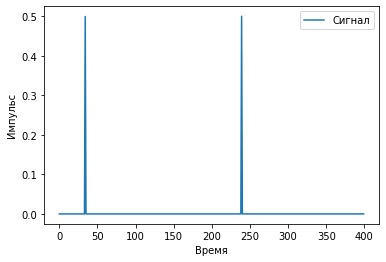

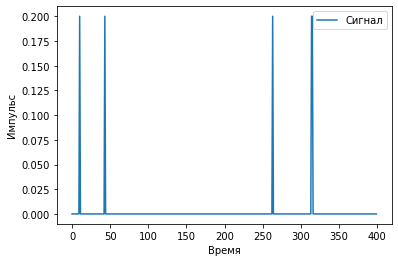

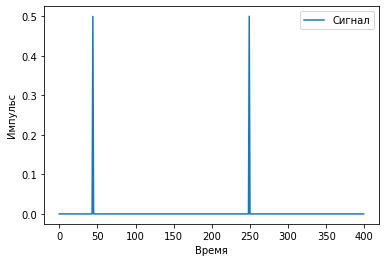

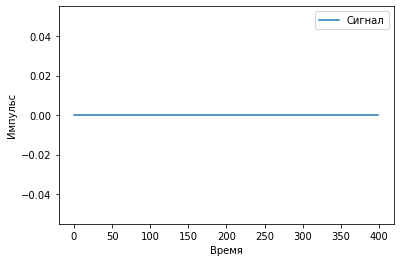

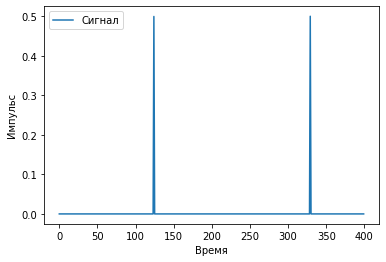

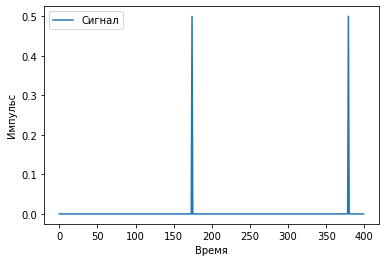

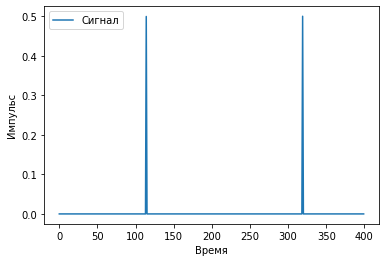

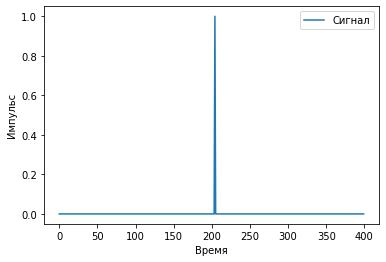

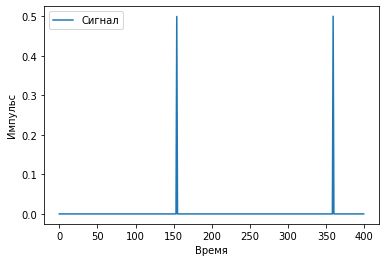

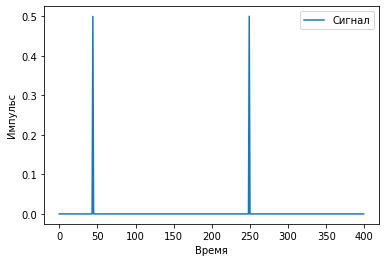

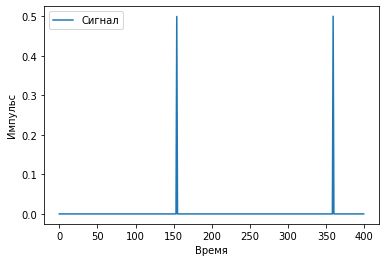

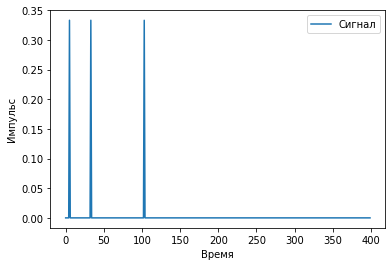

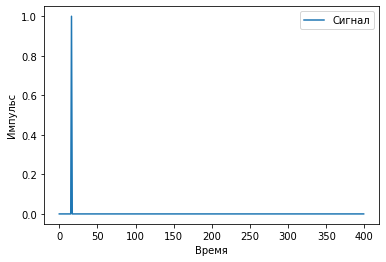

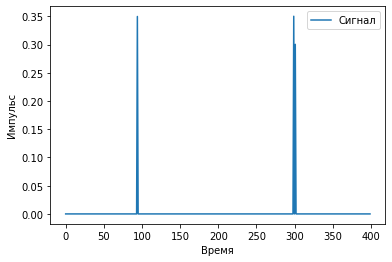

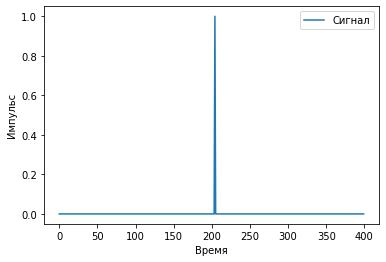

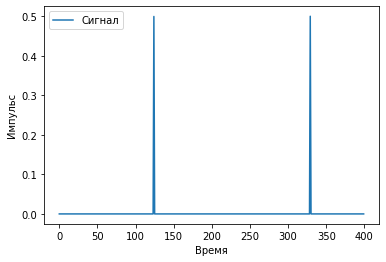

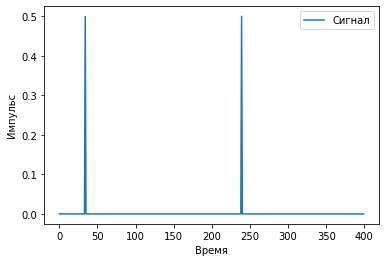

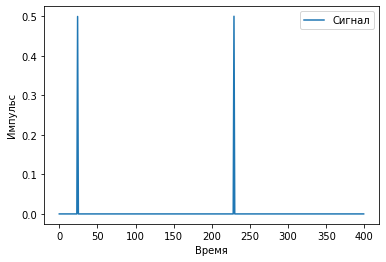

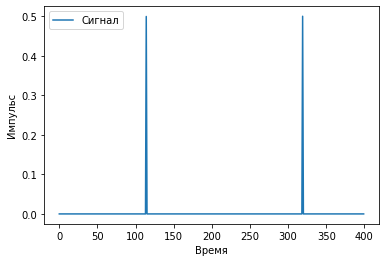

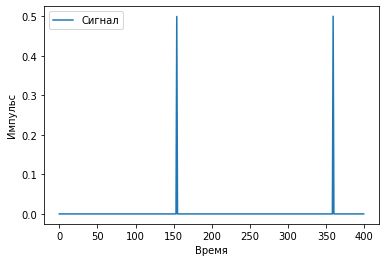

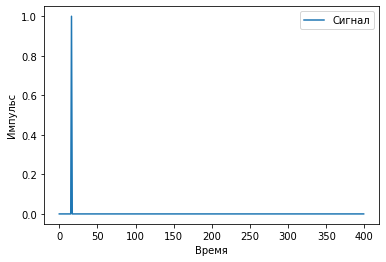

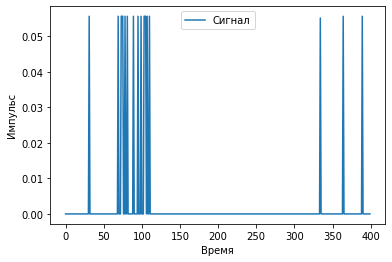

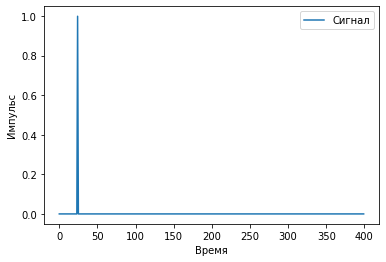

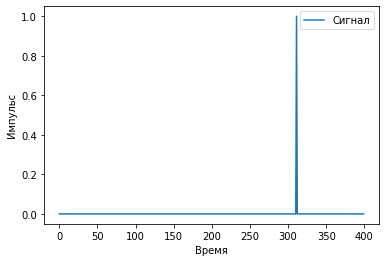

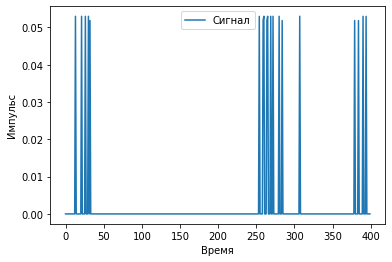

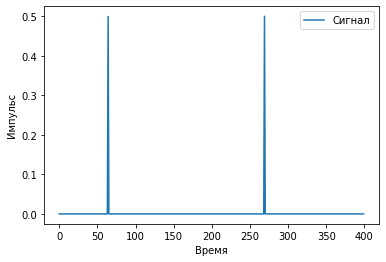

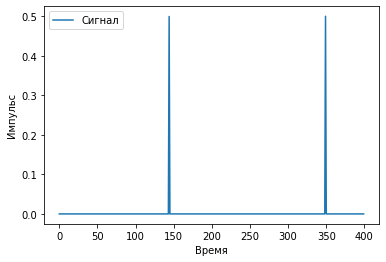

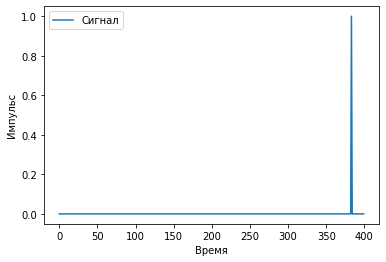

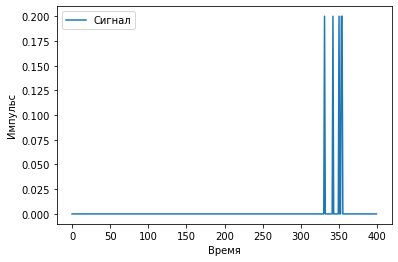

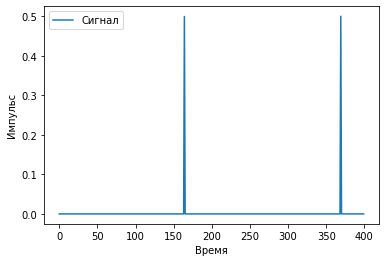

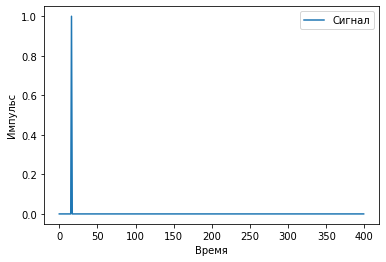

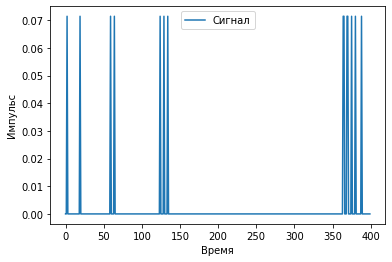

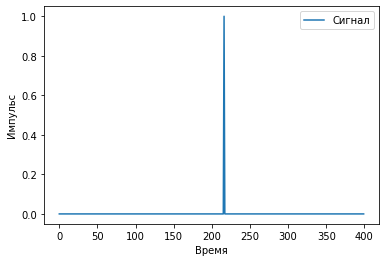

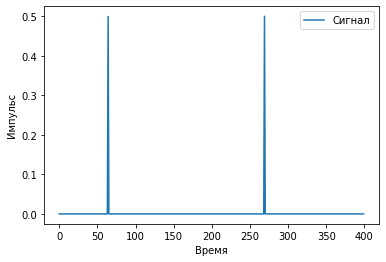

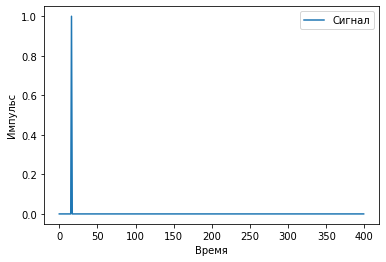

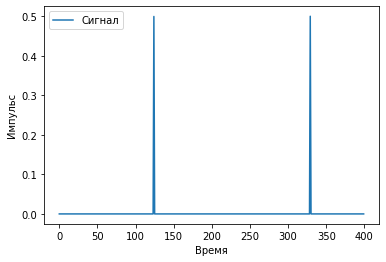

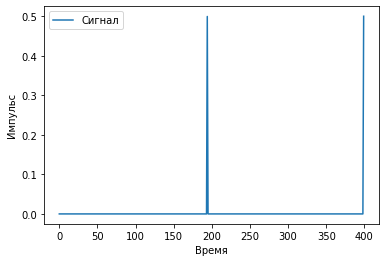

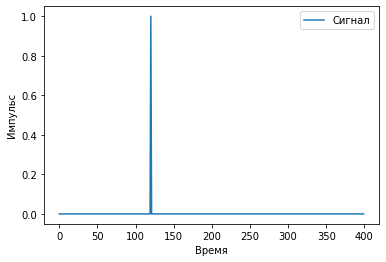

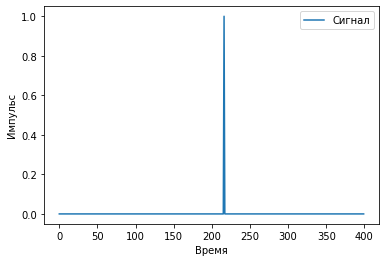

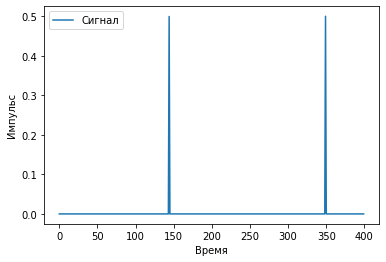

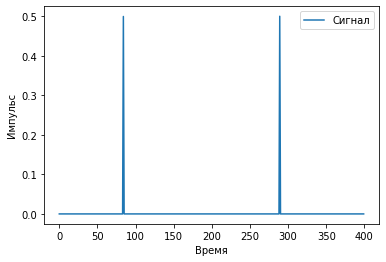

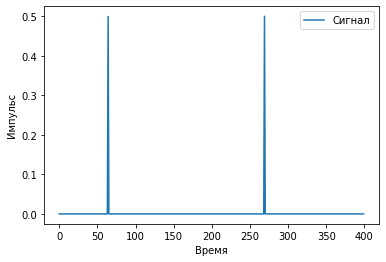

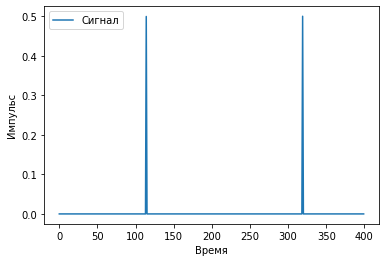

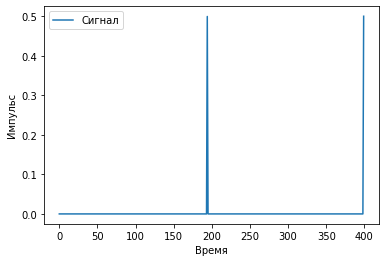

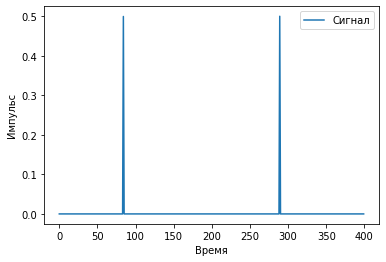

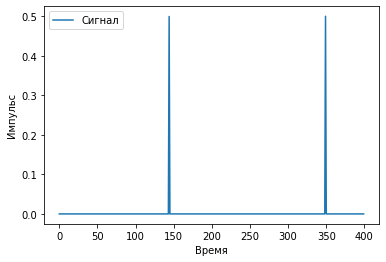

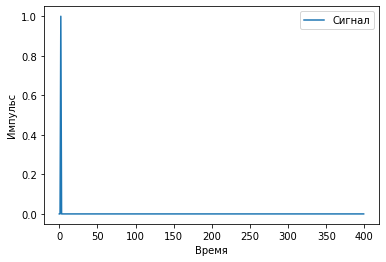

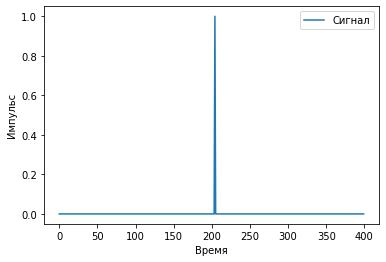

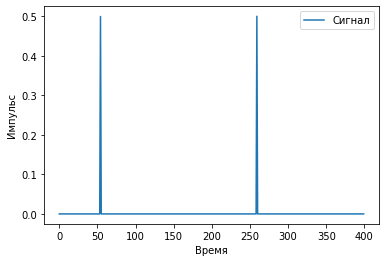

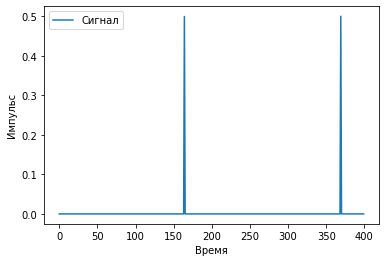

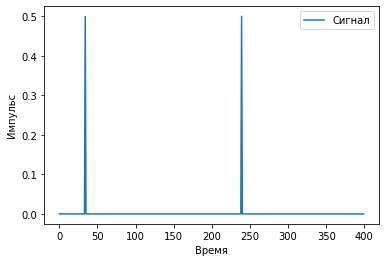

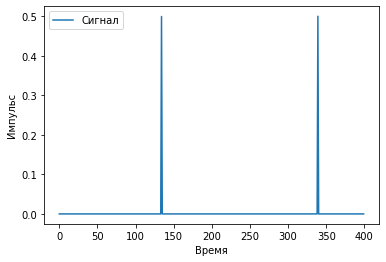

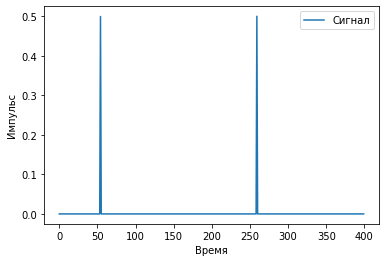

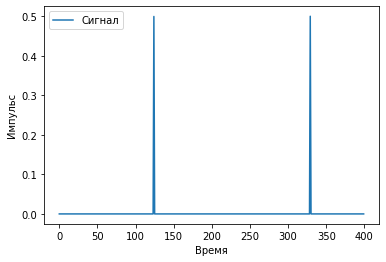

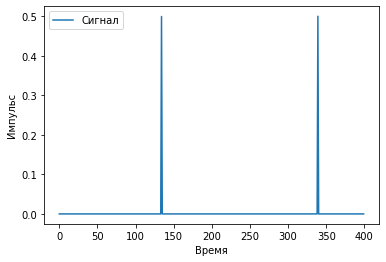

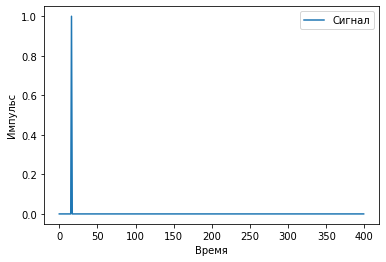

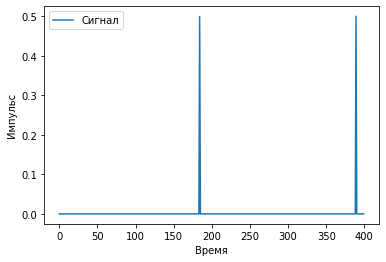

In [128]:
%matplotlib inline

idx = np.random.randint(0, X_train.shape[0], size=100)
for X_i in X_train[idx,:]:
    plt.plot(X_i.reshape(400),
             label='Сигнал')
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

In [210]:
from scipy import signal
import pickle
import sys
import os
from random import shuffle
    
from scipy import signal


def filter_signal(x):
    N = 10
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs / 2)
    y = signal.lfilter(h, 1.0, x)
    return y

path = "/Users/antonvasilev/PyCharmProjects/emg-interface/nine_movs_six_sub_split/"

# path where you want to save trained model and some other files
sec_path = "./"
persons = [1, 2, 3, 4, 5, 6]

def create_dataset(file_path, persons, moves=None):
    if (moves is None):
        moves = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    
    path = file_path + "{}_{}.pickle"
    sgn = []
    lbl = []
    for i in persons:
        for j in moves:
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8 * len(sgn)):]
    val_labels = lbl[int(0.8 * len(lbl)):]
    # test_signals = sgn[int(0.8*len(sgn)):]
    # test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    # test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels

# only two hand moves take in dataset
moves = [0, 1] # Hand up, hand down
# moves = None # All movements

(X_train2,train_labels,__,___ ) = create_dataset(path, persons, moves)

(593, 400)


(474, 400)
(474, 2)


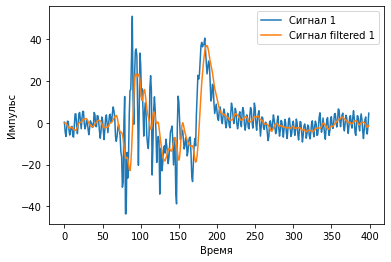

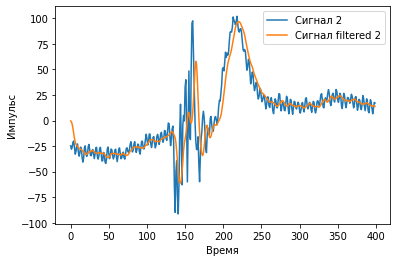

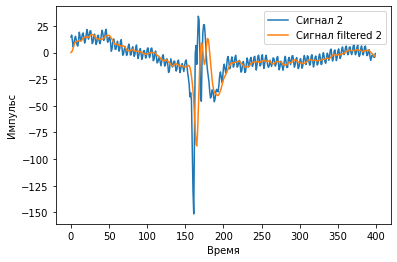

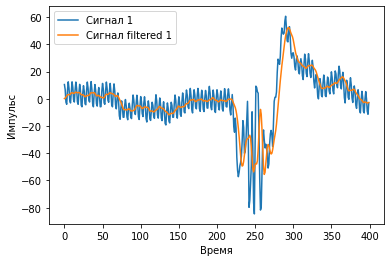

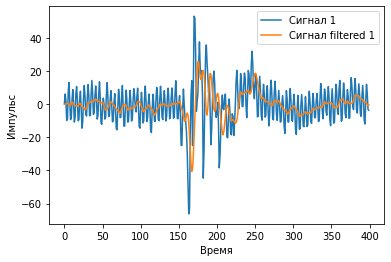

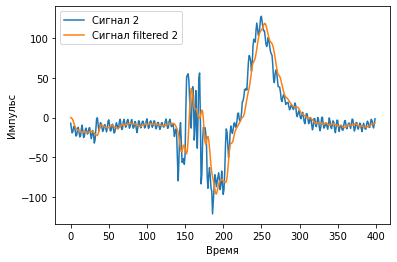

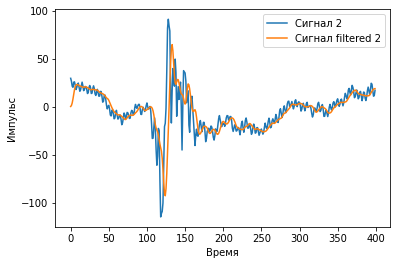

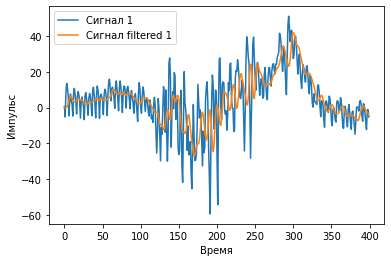

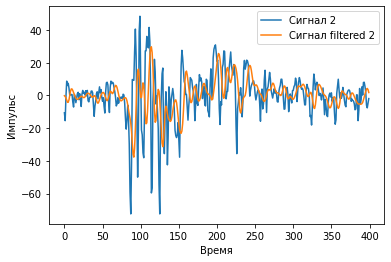

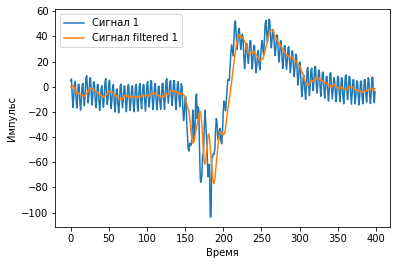

In [211]:
X_train2 = np.array(X_train2)
print(X_train2.shape)
print(train_labels.shape)
idx = np.random.randint(0, X_train2.shape[0], size=10)
X_train_filtered = []
for X in X_train2:
    X_train_filtered.append(filter_signal(X))
X_train_filtered = np.array(X_train_filtered)

for i in idx:
    X_i = X_train2[i]
    plt.plot(X_i,
             label='Сигнал ' + str(np.argmax(train_labels[i]) + 1))
    plt.plot(X_train_filtered[i],
             label='Сигнал filtered ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()


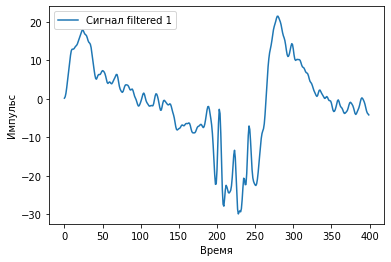

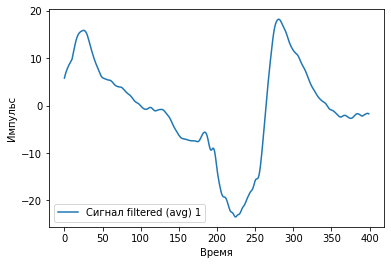

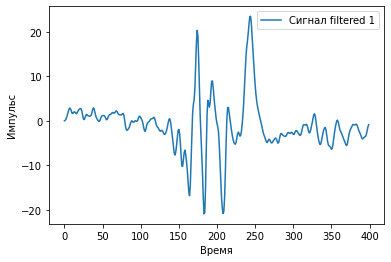

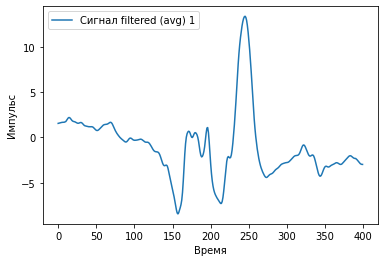

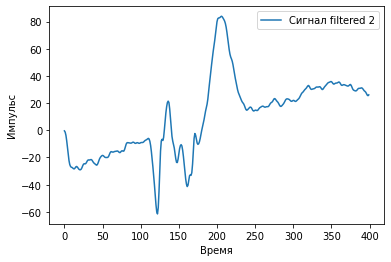

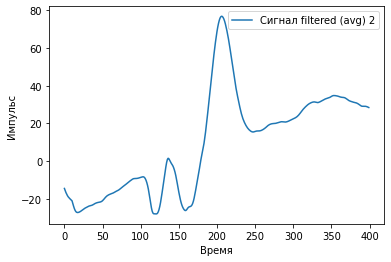

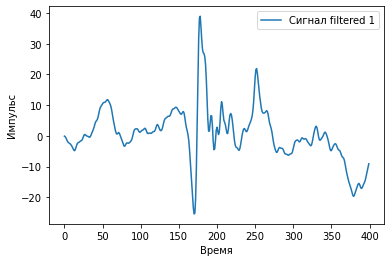

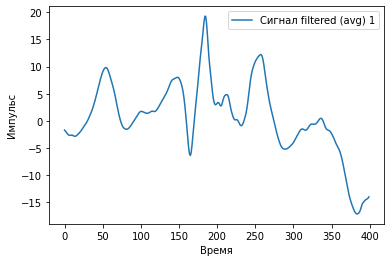

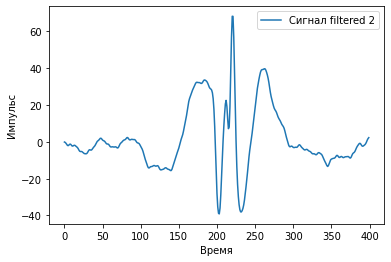

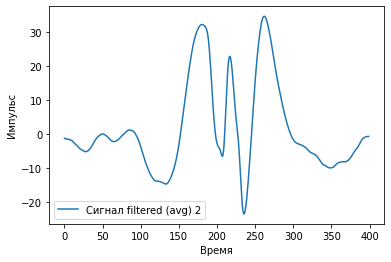

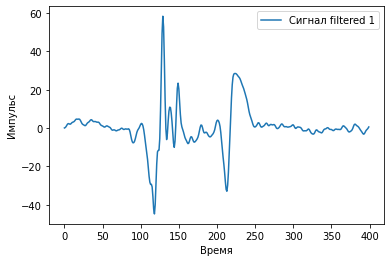

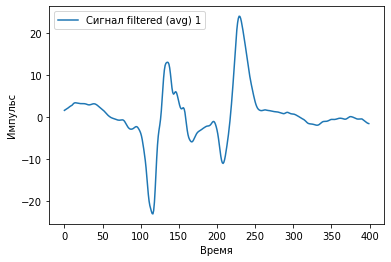

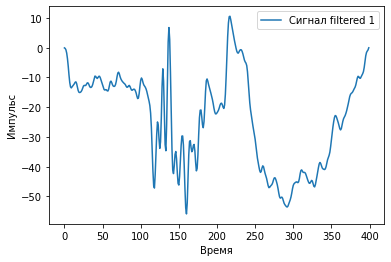

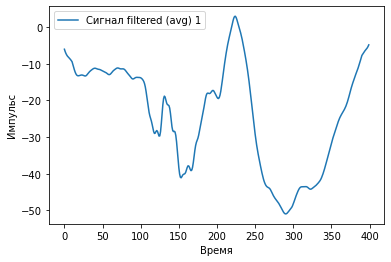

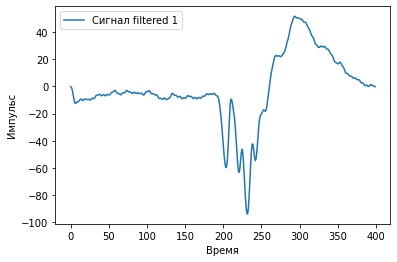

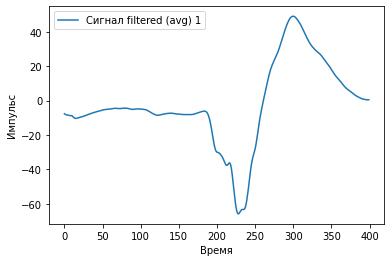

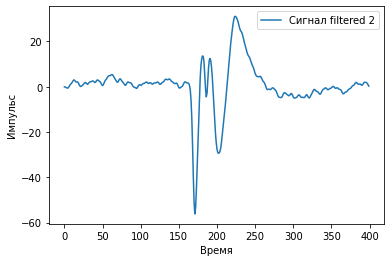

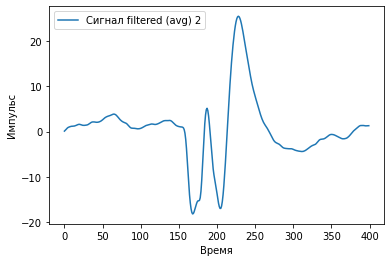

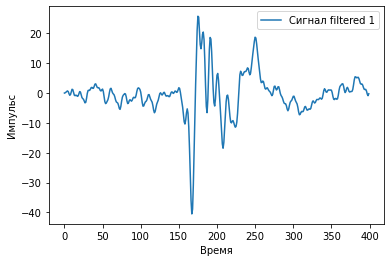

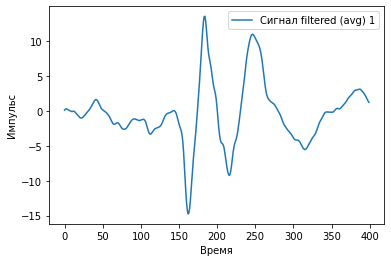

In [212]:
# Moving Average Filter (SMA)
X_train_filtered_sma0 = []
for i0 in range(0, X_train_filtered.shape[0]):
    X_train_filtered_sma = []
    last_index = X_train_filtered[i0].shape[0]

    N = 20
    N_half = int(N / 2)

    for i in range(0, last_index):
        X_average = 0
        X = X_train_filtered[i0]
        if i >= N_half and i <= last_index - N_half:
            for j in range(i - N_half, i + N_half):
                X_average += X[j]
            X_average /= N
        elif i < N_half:
            for j in range(0, i + N_half):
#                 print('+=')
#                 print(X_train_scaled[i0][j])
                X_average += X[j]
            X_average /= (i + N_half)
        else:
            for j in range(i - N_half, last_index):
                X_average += X[j]
            X_average /= (last_index - i + N_half)
    #     print('scaled')
    #     print(X_train_scaled[i])
    #     print('average')
    #     print(X_average)
        X_train_filtered_sma.append(X_average)

#     plt.plot(X_train_scaled[i0],
#              label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
#     plt.xlabel('Время')
#     plt.ylabel('Импульс')
#     plt.legend()
#     plt.show()


#     plt.plot(X_train_filtered_sma,
#              label='Сигнал avg ' + str(np.argmax(train_labels[i]) + 1))
#     plt.xlabel('Время')
#     plt.ylabel('Импульс')
#     plt.legend()
#     plt.show()
#     break
    X_train_filtered_sma0.append(X_train_filtered_sma)

idx = np.random.randint(0, X_train2.shape[0], size=10)
for i in idx:
    X_i = X_train_filtered[i]
    plt.plot(X_i,
             label='Сигнал filtered ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    
    plt.plot(X_train_filtered_sma0[i],
             label='Сигнал filtered (avg) ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

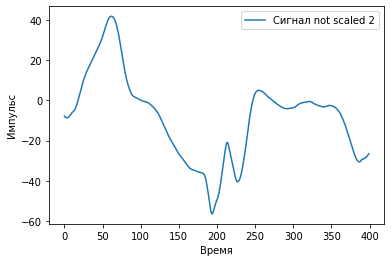

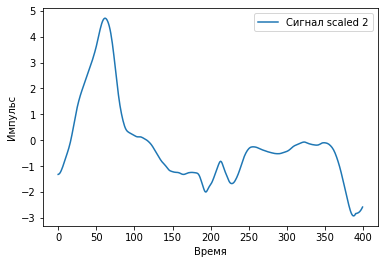

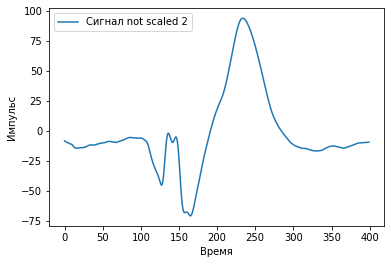

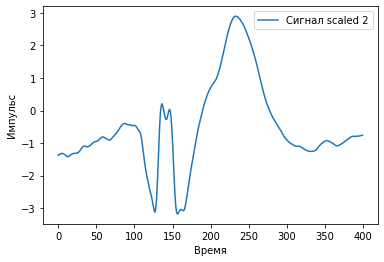

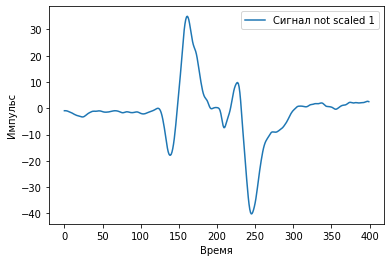

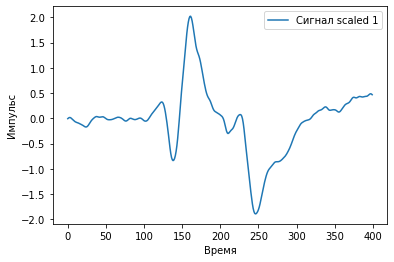

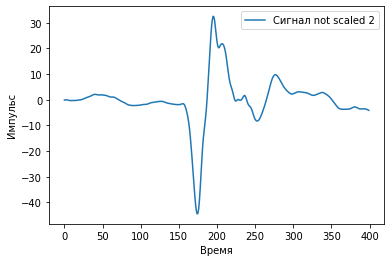

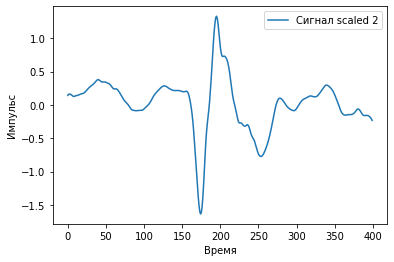

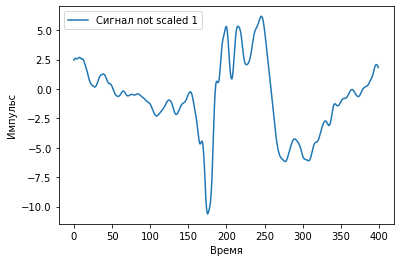

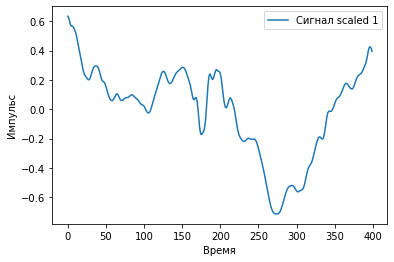

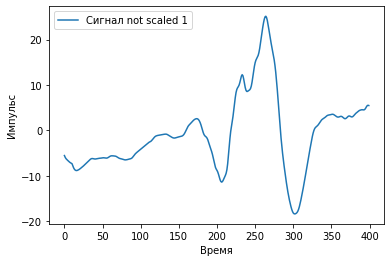

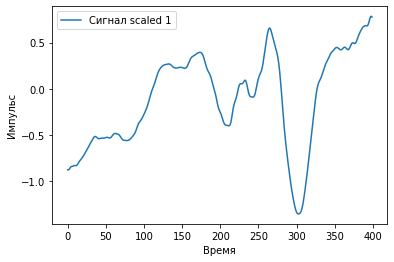

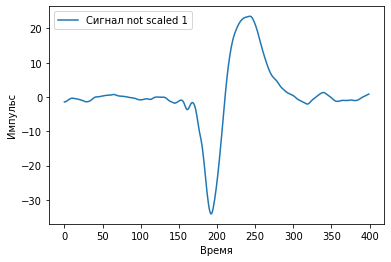

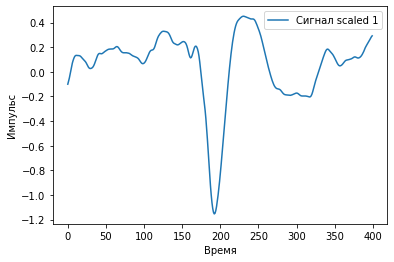

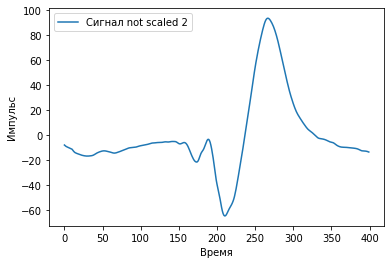

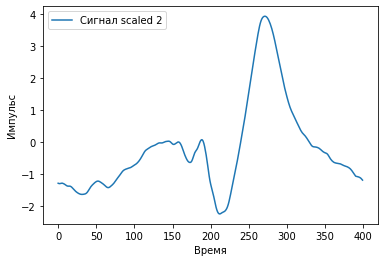

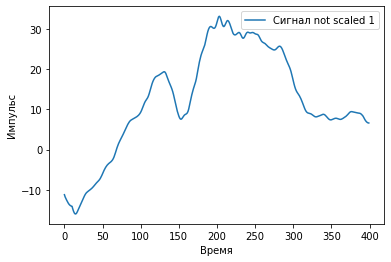

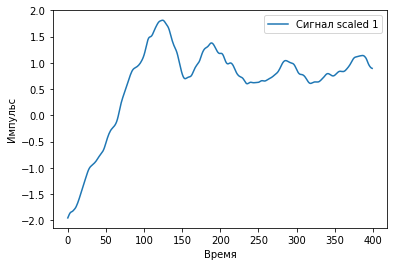

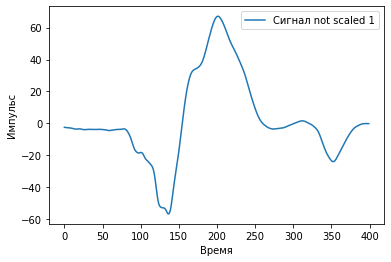

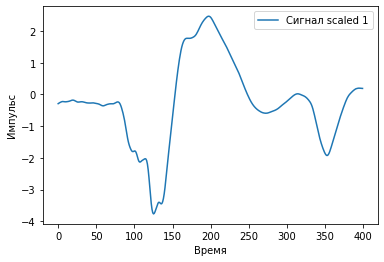

In [213]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

idx = np.random.randint(0, X_train2.shape[0], size=10)

scaler = StandardScaler()
# scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(np.array(X_train_filtered_sma0))
# print(scaled)

for i in idx:
    X_i = X_train_filtered_sma0[i]
    plt.plot(X_i,
             label='Сигнал not scaled ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    
    plt.plot(X_train_scaled[i],
             label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    



In [220]:
EPOCH_COUNT = 250

In [235]:
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten

def build_dense_model(input_size, num_sensors, num_classes):
    """
    Simple Dense model
    """
    model_ffnn = Sequential()
    # FFNN
    model_ffnn.add(Dense(256, input_dim=400, activation='relu'))
    model_ffnn.add(Dropout(0.3))
    model_ffnn.add(Dense(128, activation='relu'))
    model_ffnn.add(Dropout(0.3))
    model_ffnn.add(BatchNormalization())
    model_ffnn.add(Dense(64, activation='relu'))
    model_ffnn.add(Dropout(0.2))
    model_ffnn.add((Dense(32, activation='relu')))
    model_ffnn.add(Dropout(0.2))
    model_ffnn.add((Dense(32, activation='relu')))
    model_ffnn.add(Dropout(0.2))
    model_ffnn.add(BatchNormalization())
    model_ffnn.add(Dense(num_classes, activation='softmax'))


    opt = Adam(learning_rate=0.01)

    model_ffnn.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model
    
def dense_fit(X_train_res, Y_train_res):
    # Model dense
    # X_train_res = X_train
    # Y_train_res = one_hot_labels
    X_train_res = X_train_scaled # X_train_filtered # X_train2
    Y_train_res = train_labels

    # filtration

    # row_sums = X_train_res.sum(axis=1)
    # X_train_res = X_train_res / row_sums[:, np.newaxis]

    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]

    model_ffnn = build_dense_model(time_series, 1, num_classes)
    
    # Train the model, iterating on the data in batches of 32 samples
    history_ffnn = model_ffnn.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3)
    
    return model_ffnn, history_ffnn

model_ffnn, history_ffnn = dense_fit(X_train_res, Y_train_res)


Epoch 1/250
4/4 [==============================] - 0s 74ms/step - loss: 0.0169 - accuracy: 0.9940 - val_loss: 0.6119 - val_accuracy: 0.9021
Epoch 2/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.5814 - val_accuracy: 0.9091
Epoch 3/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0162 - accuracy: 0.9909 - val_loss: 0.5725 - val_accuracy: 0.9091
Epoch 4/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.5540 - val_accuracy: 0.9091
Epoch 5/250
4/4 [==============================] - 0s 33ms/step - loss: 0.0280 - accuracy: 0.9879 - val_loss: 0.5388 - val_accuracy: 0.9161
Epoch 6/250
4/4 [==============================] - 0s 33ms/step - loss: 0.0133 - accuracy: 0.9970 - val_loss: 0.5376 - val_accuracy: 0.9021
Epoch 7/250
4/4 [==============================] - 0s 33ms/step - loss: 0.0173 - accuracy: 0.9940 - val_loss: 0.5571 - val_accuracy: 0.8951
Epoch 8/250
4/4 [===

4/4 [==============================] - 0s 31ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.6005 - val_accuracy: 0.9021
Epoch 60/250
4/4 [==============================] - 0s 34ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.6436 - val_accuracy: 0.8881
Epoch 61/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0150 - accuracy: 0.9909 - val_loss: 0.7017 - val_accuracy: 0.8881
Epoch 62/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0144 - accuracy: 0.9970 - val_loss: 0.7406 - val_accuracy: 0.8951
Epoch 63/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0221 - accuracy: 0.9909 - val_loss: 0.7488 - val_accuracy: 0.8951
Epoch 64/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0119 - accuracy: 0.9970 - val_loss: 0.7289 - val_accuracy: 0.8881
Epoch 65/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.6978 - val_accuracy: 0.8881
Epoch 66/250
4/4 [========

4/4 [==============================] - 0s 30ms/step - loss: 0.0260 - accuracy: 0.9909 - val_loss: 0.6827 - val_accuracy: 0.8951
Epoch 118/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0261 - accuracy: 0.9909 - val_loss: 0.6604 - val_accuracy: 0.8811
Epoch 119/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0166 - accuracy: 0.9940 - val_loss: 0.6514 - val_accuracy: 0.8811
Epoch 120/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.6270 - val_accuracy: 0.8741
Epoch 121/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0130 - accuracy: 0.9940 - val_loss: 0.6557 - val_accuracy: 0.8951
Epoch 122/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.6822 - val_accuracy: 0.8951
Epoch 123/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.6847 - val_accuracy: 0.8951
Epoch 124/250
4/4 [=

Epoch 175/250
4/4 [==============================] - 0s 33ms/step - loss: 0.0408 - accuracy: 0.9849 - val_loss: 0.6214 - val_accuracy: 0.9091
Epoch 176/250
4/4 [==============================] - 0s 34ms/step - loss: 0.0239 - accuracy: 0.9970 - val_loss: 0.5687 - val_accuracy: 0.9021
Epoch 177/250
4/4 [==============================] - 0s 33ms/step - loss: 0.0291 - accuracy: 0.9940 - val_loss: 0.5835 - val_accuracy: 0.8951
Epoch 178/250
4/4 [==============================] - 0s 36ms/step - loss: 0.0272 - accuracy: 0.9940 - val_loss: 0.6038 - val_accuracy: 0.9021
Epoch 179/250
4/4 [==============================] - 0s 34ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.6023 - val_accuracy: 0.8951
Epoch 180/250
4/4 [==============================] - 0s 34ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5892 - val_accuracy: 0.9021
Epoch 181/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0129 - accuracy: 0.9970 - val_loss: 0.5760 - val_accuracy: 0.9091
Epoch 

Epoch 233/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5700 - val_accuracy: 0.9091
Epoch 234/250
4/4 [==============================] - 0s 38ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5738 - val_accuracy: 0.9091
Epoch 235/250
4/4 [==============================] - 0s 36ms/step - loss: 0.0048 - accuracy: 0.9970 - val_loss: 0.5712 - val_accuracy: 0.9021
Epoch 236/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0147 - accuracy: 0.9970 - val_loss: 0.5721 - val_accuracy: 0.9091
Epoch 237/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0114 - accuracy: 0.9970 - val_loss: 0.5595 - val_accuracy: 0.9091
Epoch 238/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5741 - val_accuracy: 0.9091
Epoch 239/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5788 - val_accuracy: 0.9091
Epoch 

In [236]:
# Conv1D
from keras.layers import Conv1D
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten, GlobalAveragePooling1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Model dense
# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels

def build_conv1d_model(input_size, num_sensors, num_classes):
    """
    Conv 1D model
    """
    
    model = Sequential()
    # Conv1d
    model.add(Reshape((input_size, num_sensors), input_shape=(input_size,)))
    model.add(Conv1D(25, 80, activation='relu', input_shape=(input_size, num_sensors)))
    model.add(Conv1D(25, 6, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(16, 6, activation='relu'))
    model.add(Conv1D(12, 4, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))



    opt = Adam(learning_rate=0.01)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model

def conv1d_fit(X_train_res, Y_train_res):
    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]
    num_sensors = 1

    model_conv1 = build_conv1d_model(time_series, num_sensors, num_classes)

    # The EarlyStopping callback monitors training accuracy:
    # if it fails to improve for two consecutive epochs,
    # training stops early
    callbacks_list = [
        ModelCheckpoint(
            filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
            monitor='val_loss', save_best_only=True),
        EarlyStopping(monitor='accuracy', patience=1)
    ]

    # Train the model, iterating on the data in batches of 32 samples
    history_conv1 = model_conv1.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3
    #                                 , callbacks=callbacks_list
                                   )
    
    return model_conv1, history_conv1


model_conv1, history_conv1 = conv1d_fit(X_train_res, Y_train_res)


Epoch 1/250
4/4 [==============================] - 1s 102ms/step - loss: 0.7001 - accuracy: 0.5287 - val_loss: 0.6685 - val_accuracy: 0.5734
Epoch 2/250
4/4 [==============================] - 0s 44ms/step - loss: 0.6829 - accuracy: 0.5589 - val_loss: 0.6987 - val_accuracy: 0.5734
Epoch 3/250
4/4 [==============================] - 0s 42ms/step - loss: 0.6731 - accuracy: 0.6344 - val_loss: 0.6199 - val_accuracy: 0.7832
Epoch 4/250
4/4 [==============================] - 0s 47ms/step - loss: 0.6539 - accuracy: 0.6828 - val_loss: 0.6077 - val_accuracy: 0.7832
Epoch 5/250
4/4 [==============================] - 0s 41ms/step - loss: 0.6401 - accuracy: 0.6375 - val_loss: 0.5530 - val_accuracy: 0.7972
Epoch 6/250
4/4 [==============================] - 0s 43ms/step - loss: 0.6140 - accuracy: 0.7251 - val_loss: 0.6204 - val_accuracy: 0.7762
Epoch 7/250
4/4 [==============================] - 0s 44ms/step - loss: 0.6163 - accuracy: 0.7190 - val_loss: 0.5604 - val_accuracy: 0.7413
Epoch 8/250
4/4 [==

4/4 [==============================] - 0s 50ms/step - loss: 0.2971 - accuracy: 0.8882 - val_loss: 0.3972 - val_accuracy: 0.8392
Epoch 60/250
4/4 [==============================] - 0s 47ms/step - loss: 0.2824 - accuracy: 0.8943 - val_loss: 0.3872 - val_accuracy: 0.8671
Epoch 61/250
4/4 [==============================] - 0s 47ms/step - loss: 0.2653 - accuracy: 0.9124 - val_loss: 0.3803 - val_accuracy: 0.8601
Epoch 62/250
4/4 [==============================] - 0s 42ms/step - loss: 0.3454 - accuracy: 0.8550 - val_loss: 0.3559 - val_accuracy: 0.8741
Epoch 63/250
4/4 [==============================] - 0s 48ms/step - loss: 0.3278 - accuracy: 0.8822 - val_loss: 0.3762 - val_accuracy: 0.8741
Epoch 64/250
4/4 [==============================] - 0s 49ms/step - loss: 0.3361 - accuracy: 0.8640 - val_loss: 0.4094 - val_accuracy: 0.8392
Epoch 65/250
4/4 [==============================] - 0s 58ms/step - loss: 0.3084 - accuracy: 0.8550 - val_loss: 0.4500 - val_accuracy: 0.8182
Epoch 66/250
4/4 [========

4/4 [==============================] - 0s 41ms/step - loss: 0.2192 - accuracy: 0.9184 - val_loss: 0.6507 - val_accuracy: 0.8741
Epoch 118/250
4/4 [==============================] - 0s 43ms/step - loss: 0.2031 - accuracy: 0.9154 - val_loss: 0.7989 - val_accuracy: 0.8671
Epoch 119/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1943 - accuracy: 0.9275 - val_loss: 0.6697 - val_accuracy: 0.8671
Epoch 120/250
4/4 [==============================] - 0s 42ms/step - loss: 0.1806 - accuracy: 0.9275 - val_loss: 0.7465 - val_accuracy: 0.8811
Epoch 121/250
4/4 [==============================] - 0s 44ms/step - loss: 0.1654 - accuracy: 0.9366 - val_loss: 0.7130 - val_accuracy: 0.8881
Epoch 122/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1794 - accuracy: 0.9426 - val_loss: 0.6446 - val_accuracy: 0.8601
Epoch 123/250
4/4 [==============================] - 0s 43ms/step - loss: 0.2116 - accuracy: 0.9245 - val_loss: 0.6809 - val_accuracy: 0.8462
Epoch 124/250
4/4 [=

Epoch 175/250
4/4 [==============================] - 0s 42ms/step - loss: 0.0858 - accuracy: 0.9607 - val_loss: 1.9005 - val_accuracy: 0.8322
Epoch 176/250
4/4 [==============================] - 0s 44ms/step - loss: 0.1033 - accuracy: 0.9547 - val_loss: 2.0705 - val_accuracy: 0.8462
Epoch 177/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1036 - accuracy: 0.9758 - val_loss: 1.7180 - val_accuracy: 0.8462
Epoch 178/250
4/4 [==============================] - 0s 49ms/step - loss: 0.1196 - accuracy: 0.9517 - val_loss: 1.7592 - val_accuracy: 0.8671
Epoch 179/250
4/4 [==============================] - 0s 64ms/step - loss: 0.1129 - accuracy: 0.9637 - val_loss: 1.8118 - val_accuracy: 0.8462
Epoch 180/250
4/4 [==============================] - 0s 70ms/step - loss: 0.0741 - accuracy: 0.9789 - val_loss: 1.5804 - val_accuracy: 0.8392
Epoch 181/250
4/4 [==============================] - 0s 57ms/step - loss: 0.0720 - accuracy: 0.9728 - val_loss: 2.1183 - val_accuracy: 0.8392
Epoch 

Epoch 233/250
4/4 [==============================] - 0s 43ms/step - loss: 0.0710 - accuracy: 0.9789 - val_loss: 1.8776 - val_accuracy: 0.8462
Epoch 234/250
4/4 [==============================] - 0s 41ms/step - loss: 0.1237 - accuracy: 0.9668 - val_loss: 1.8730 - val_accuracy: 0.8462
Epoch 235/250
4/4 [==============================] - 0s 42ms/step - loss: 0.0840 - accuracy: 0.9758 - val_loss: 2.2215 - val_accuracy: 0.8392
Epoch 236/250
4/4 [==============================] - 0s 43ms/step - loss: 0.0767 - accuracy: 0.9728 - val_loss: 2.2047 - val_accuracy: 0.8462
Epoch 237/250
4/4 [==============================] - 0s 40ms/step - loss: 0.0780 - accuracy: 0.9758 - val_loss: 2.0715 - val_accuracy: 0.8462
Epoch 238/250
4/4 [==============================] - 0s 41ms/step - loss: 0.0834 - accuracy: 0.9637 - val_loss: 2.2105 - val_accuracy: 0.8322
Epoch 239/250
4/4 [==============================] - 0s 42ms/step - loss: 0.1057 - accuracy: 0.9668 - val_loss: 2.1925 - val_accuracy: 0.8392
Epoch 

In [234]:
# Model LSTM
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten

# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels


def build_lstm_model(input_size, num_sensors, num_classes):
    """
    LSTM model
    """
    
    model = Sequential()
    # RNN
    model.add(Reshape((40, 10), input_shape=(input_size,)))
    model.add(LSTM(units=64,return_sequences=True,input_shape=(None, 40, 10)))
    model.add(Dropout(0.2))
    # model.add(LSTM(units=16,return_sequences=True))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units=50,return_sequences=True))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units=50))
    # model.add(Dropout(0.2))

    # FFNN
    # model.add(Dense(256, input_dim=400, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(Dense(128, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(BatchNormalization())
    # model.add(Dense(64, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Flatten())
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))


    opt = Adam(learning_rate=0.001)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model

    
def lstm_fit(X_train_res, Y_train_res):
    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]

    model = build_lstm_model(time_series, 1, num_classes)
    
    # Train the model, iterating on the data in batches of 32 samples
    history = model.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3)

    return model, history


model, history = lstm_fit(X_train_res, Y_train_res)

Epoch 1/250
4/4 [==============================] - 3s 229ms/step - loss: 1.0893 - accuracy: 0.4653 - val_loss: 0.6731 - val_accuracy: 0.5594
Epoch 2/250
4/4 [==============================] - 0s 48ms/step - loss: 0.8721 - accuracy: 0.5680 - val_loss: 0.6545 - val_accuracy: 0.6294
Epoch 3/250
4/4 [==============================] - 0s 41ms/step - loss: 0.7097 - accuracy: 0.5921 - val_loss: 0.6397 - val_accuracy: 0.6364
Epoch 4/250
4/4 [==============================] - 0s 41ms/step - loss: 0.7182 - accuracy: 0.6193 - val_loss: 0.6344 - val_accuracy: 0.6224
Epoch 5/250
4/4 [==============================] - 0s 33ms/step - loss: 0.7189 - accuracy: 0.6012 - val_loss: 0.6307 - val_accuracy: 0.6364
Epoch 6/250
4/4 [==============================] - 0s 35ms/step - loss: 0.7111 - accuracy: 0.6224 - val_loss: 0.6246 - val_accuracy: 0.6573
Epoch 7/250
4/4 [==============================] - 0s 35ms/step - loss: 0.7149 - accuracy: 0.6344 - val_loss: 0.6185 - val_accuracy: 0.6434
Epoch 8/250
4/4 [==

4/4 [==============================] - 0s 37ms/step - loss: 0.2227 - accuracy: 0.9003 - val_loss: 0.4218 - val_accuracy: 0.8112
Epoch 60/250
4/4 [==============================] - 0s 38ms/step - loss: 0.2369 - accuracy: 0.9033 - val_loss: 0.4096 - val_accuracy: 0.8112
Epoch 61/250
4/4 [==============================] - 0s 32ms/step - loss: 0.2142 - accuracy: 0.9154 - val_loss: 0.3981 - val_accuracy: 0.8182
Epoch 62/250
4/4 [==============================] - 0s 32ms/step - loss: 0.2155 - accuracy: 0.9184 - val_loss: 0.3938 - val_accuracy: 0.8252
Epoch 63/250
4/4 [==============================] - 0s 32ms/step - loss: 0.2594 - accuracy: 0.8943 - val_loss: 0.3969 - val_accuracy: 0.8252
Epoch 64/250
4/4 [==============================] - 0s 36ms/step - loss: 0.1869 - accuracy: 0.9396 - val_loss: 0.4044 - val_accuracy: 0.8112
Epoch 65/250
4/4 [==============================] - 0s 38ms/step - loss: 0.2271 - accuracy: 0.9094 - val_loss: 0.3962 - val_accuracy: 0.8322
Epoch 66/250
4/4 [========

4/4 [==============================] - 0s 33ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.4197 - val_accuracy: 0.8881
Epoch 118/250
4/4 [==============================] - 0s 34ms/step - loss: 0.0625 - accuracy: 0.9789 - val_loss: 0.4338 - val_accuracy: 0.8811
Epoch 119/250
4/4 [==============================] - 0s 38ms/step - loss: 0.0518 - accuracy: 0.9879 - val_loss: 0.4359 - val_accuracy: 0.8881
Epoch 120/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0794 - accuracy: 0.9758 - val_loss: 0.4054 - val_accuracy: 0.8671
Epoch 121/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0541 - accuracy: 0.9909 - val_loss: 0.4004 - val_accuracy: 0.8741
Epoch 122/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0649 - accuracy: 0.9728 - val_loss: 0.3943 - val_accuracy: 0.8881
Epoch 123/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0887 - accuracy: 0.9728 - val_loss: 0.4091 - val_accuracy: 0.9021
Epoch 124/250
4/4 [=

Epoch 175/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0283 - accuracy: 0.9940 - val_loss: 0.5431 - val_accuracy: 0.8741
Epoch 176/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.5056 - val_accuracy: 0.8881
Epoch 177/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.5011 - val_accuracy: 0.8951
Epoch 178/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0254 - accuracy: 0.9970 - val_loss: 0.4981 - val_accuracy: 0.8881
Epoch 179/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0398 - accuracy: 0.9879 - val_loss: 0.5013 - val_accuracy: 0.8741
Epoch 180/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0462 - accuracy: 0.9909 - val_loss: 0.5056 - val_accuracy: 0.8881
Epoch 181/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0299 - accuracy: 0.9940 - val_loss: 0.5886 - val_accuracy: 0.8741
Epoch 

Epoch 233/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.4813 - val_accuracy: 0.9021
Epoch 234/250
4/4 [==============================] - 0s 28ms/step - loss: 0.0136 - accuracy: 0.9940 - val_loss: 0.4966 - val_accuracy: 0.9021
Epoch 235/250
4/4 [==============================] - 0s 29ms/step - loss: 0.0251 - accuracy: 0.9909 - val_loss: 0.5149 - val_accuracy: 0.9021
Epoch 236/250
4/4 [==============================] - 0s 30ms/step - loss: 0.0330 - accuracy: 0.9970 - val_loss: 0.5243 - val_accuracy: 0.9021
Epoch 237/250
4/4 [==============================] - 0s 31ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.5231 - val_accuracy: 0.9021
Epoch 238/250
4/4 [==============================] - 0s 32ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.5306 - val_accuracy: 0.9021
Epoch 239/250
4/4 [==============================] - 0s 33ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.5442 - val_accuracy: 0.9091
Epoch 

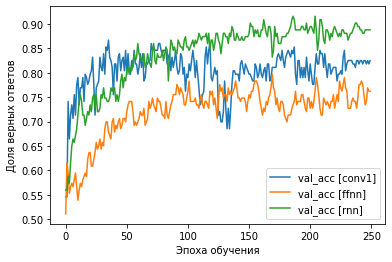

In [224]:
plt.plot(history_conv1.history['val_accuracy'],
        label='val_acc [conv1]')
# plt.plot(history_ffnn.history['accuracy'],
#          label='val [ffnn]')
plt.plot(history_ffnn.history['val_accuracy'],
         label='val_acc [ffnn]')


# plt.plot(history.history['accuracy'],
#          label='val [rnn]')
plt.plot(history.history['val_accuracy'],
         label='val_acc [rnn]')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.savefig('simple_rnn_history_with_2_moves_normal_data.png')

In [225]:
# compare models
print('accurace conv1')
print(model_conv1.evaluate(X_train_res, Y_train_res)[1])
print('accurace ffnn')
print(model_ffnn.evaluate(X_train_res, Y_train_res)[1])
print('accurace rnn')
print(model.evaluate(X_train_res, Y_train_res)[1])

accurace conv1
15/15 [==============================] - 0s 4ms/step - loss: 1.0183 - accuracy: 0.9198
0.9198312163352966
accurace ffnn
15/15 [==============================] - 0s 3ms/step - loss: 0.2551 - accuracy: 0.9262
0.9261603355407715
accurace rnn
15/15 [==============================] - 0s 8ms/step - loss: 0.1824 - accuracy: 0.9662
0.9662446975708008


804
1/1 [==============================] - 2s 2s/step
[[ 0.         -0.         -0.          0.         -0.          0.
  -0.          0.          0.         -0.          0.         -0.
  -0.          0.         -0.          0.         -0.         -0.
  -0.         -0.          0.          0.          0.          0.
   0.          0.         -0.         -0.          0.         -0.
   0.         -0.         -0.         -0.          0.49970905  0.
   0.         -0.          0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.     

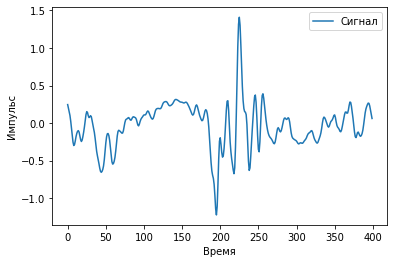

In [134]:
index = np.random.randint(0, X_train_res.shape[0] - 1, 1)[0]
print(index)
y_pred = model.predict(np.array(X_train_res[index:index+1]))
print(X_train[index:index+1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)
print('y_real')
print(Y_train_res[index])
print('Is corrrect?')
print(np.argmax(y_pred) == np.argmax(Y_train_res[index]))

plt.plot(X_train_res[index],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')

In [ ]:

# Ищем проблему в моделях

# Берем сначала по 1 пользователю и пару действий и смотрим точность на каждой модели
# После увеличиваем количество людей и действий. Смотрим, где начинает возникать ошибка

# Максимум 1-6 человек
persons_iterator = [
    [1],
    [1, 2],
    [1, 3],
    [1, 4],
]
# Максимум 0-8 жестов
movements_iterator = [
    [0, 1],
]

def model_iterator_factory():
    """
    Создает список моделей, которые мы тестируем
    """
    models = []
    models.add()
    models.add()
    models.add()
    return models


# Результаты обучения
fit_result = {}
# Перебираем комбинации людей
for persons in persons_iterator:
    # Для каждой комбинации людей - проверяем все виды жестов в датасете
    for move in movenets_iterator:
        # Тут сравниваем 3 модели для каждой 
        for model in models:
            # обучаем модель и оцениваем результат
    